# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dateutil.relativedelta import relativedelta
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## 0.1 Functions

In [2]:
def descriptive_statistics(num):
    # Central Tendency - mean, median

    ct1 = pd.DataFrame(num.apply(np.mean)).T
    ct2 = pd.DataFrame(num.apply(np.median)).T

    # Dispersion - std, min, max, range, skew, curtosis
    d1 = pd.DataFrame(num.apply(min)).T
    d2 = pd.DataFrame(num.apply(max)).T
    d3 = pd.DataFrame(num.apply(lambda x: x.max()-x.min())).T
    d4 = pd.DataFrame(num.apply(np.std)).T
    d5 = pd.DataFrame(num.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(num.apply(lambda x: x.kurtosis())).T

    ctd = pd.concat([ct1,ct2,d1,d2,d3,d4,d5,d6]).T.reset_index()
    ctd.columns = ['features', 'mean','median','min','max','range','std','skew','kurtosis']
    return ctd

## 0.2 Import Data

In [3]:
df = pd.read_csv('../data/fraud_test.csv', index_col = 0)

df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 1.0 Data Description

In [4]:
df1 = df.copy()

## 1.1 Data Dimensions

In [5]:
print(f'O dataset possui {df1.shape[0]} linhas e {df1.shape[1]} colunas.')

O dataset possui 555719 linhas e 22 colunas.


## 1.2 Data Types

In [6]:
# Tipo de dados para cada variável
df1.dtypes

trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [7]:
# Quantas variávei de cada tipo
df1.dtypes.value_counts()

object     12
float64     6
int64       4
Name: count, dtype: int64

## 1.3 Null Values

In [8]:
# No NA values
df1.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

## 1.4 Data Balance

In [9]:
# Imbalance dataset
df1.is_fraud.value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

## 1.5 Descriptive Statistics

In [10]:
# Estatísticas descritivas das Transações Legítimas
display(descriptive_statistics(df1.loc[df1.is_fraud == 0][['amt']]))

# Estatísticas descritivas das Transações Fraudulentas
display(descriptive_statistics(df1.loc[df1.is_fraud == 1][['amt']]))

,features,mean,median,min,max,range,std,skew,kurtosis
0,amt,67.614408,47.15,1.0,22768.11,22767.11,152.471793,40.196261,3641.057641


,features,mean,median,min,max,range,std,skew,kurtosis
0,amt,528.356494,371.94,1.78,1320.92,1319.14,392.656034,0.037961,-1.526826


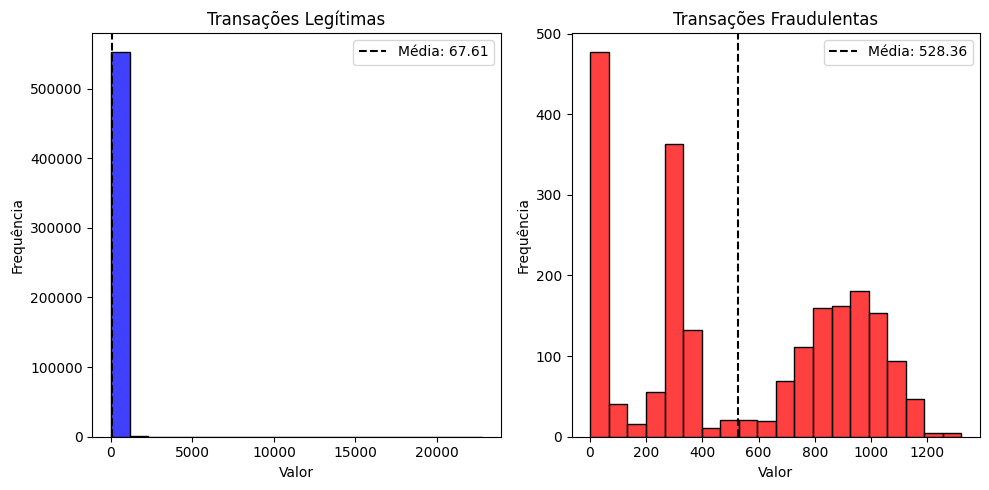

In [11]:
# Crie uma figura e eixos com 1 linha e 2 colunas
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plotar o primeiro histograma (Transações Legítimas)
sns.histplot(data=df1.loc[df1.is_fraud == 0], x='amt', bins=20, color='blue', ax=axes[0])
axes[0].axvline(x=df1.loc[df1.is_fraud == 0, 'amt'].mean(), color='black', linestyle='--', label=f'Média: {df1.loc[df1.is_fraud == 0, 'amt'].mean():.2f}')
axes[0].set_title('Transações Legítimas')
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Frequência')
axes[0].legend()

# Plotar o segundo histograma (Transações Fraudulentas)
sns.histplot(data=df1.loc[df1.is_fraud == 1], x='amt', bins=20, color='red', ax=axes[1])
axes[1].axvline(x=df1.loc[df1.is_fraud == 1, 'amt'].mean(), color='black', linestyle='--', label=f'Média: {df1.loc[df1.is_fraud == 1, 'amt'].mean():.2f}')
axes[1].set_title('Transações Fraudulentas')
axes[1].set_xlabel('Valor')
axes[1].set_ylabel('Frequência')
axes[1].legend()


# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# 2.0 Data Cleaning

In [12]:
df2 = df1.copy()
# Exibir todas as colunas
pd.set_option('display.max_columns', None)

## 2.1. Change Data Type

In [13]:
# Converting to Datetime

# CRIAR FUNÇÃO
df2.trans_date_trans_time = pd.to_datetime(df2.trans_date_trans_time, dayfirst=True)
df2.dob = pd.to_datetime(df2.dob, dayfirst=True)
df2.unix_time = pd.to_datetime(df2.unix_time, unit = 's')

# 3.0 Feature Engineering

In [14]:
df3 = df2.copy()

In [15]:
# Variável de Idade
df3['age'] = df3['dob'].apply(lambda x: relativedelta(datetime.now(), x).years)

# Variáveis de Tempo
df3['month'] = df3.trans_date_trans_time.dt.month
df3['day'] = df3.trans_date_trans_time.dt.day
df3['weekday'] = df3.trans_date_trans_time.dt.weekday
df3['hour'] = df3.trans_date_trans_time.dt.hour
df3['minute'] = df3.trans_date_trans_time.dt.minute

In [16]:
# CRIAR FUNÇÃO

# Criando um df com as Cidades e suas maiores Populações encontradas
# No datafram originais, a mesma cidade aparece com populações diferetes 
cidades = df3.groupby('city')['city_pop'].max().reset_index()
city_fraud = df3.groupby('city')['is_fraud'].sum()
cidades = pd.merge(cidades, city_fraud, on = 'city')
cidades['fraud_per_pop'] = cidades.is_fraud / cidades.city_pop
cidades

,city,city_pop,is_fraud,fraud_per_pop
0,Achille,608,0,0.000000
1,Acworth,477,0,0.000000
2,Adams,3508,12,0.003421
3,Afton,2916,7,0.002401
4,Akron,272134,9,0.000033
...,...,...,...,...
844,Woods Cross,13983,0,0.000000
845,Woodville,3395,10,0.002946
846,Yellowstone National Park,369,0,0.000000
847,Zaleski,341,0,0.000000


In [17]:
# CRIAR FUNÇÕES

# JOIN DAS CIDADES COM A BASE DE TRANSAÇÕES
df3['city_pop'] = df3.apply(lambda x: cidades.loc[cidades['city'] == x['city'], 'city_pop'].values[0] if x['city'] in cidades['city'].values else x['city_pop'], axis=1)

# Join para pegar a proporção de frauders por habitante
df3 = pd.merge(df3, cidades[['city', 'fraud_per_pop']], on = 'city')

In [18]:
df3.trans_date_trans_time
# category
# amt
# gender
# lat
# long
#city_pop
# job (???)
# merch_lat
# merch_long
# age
# month
# day	weekday	hour	minute	fraud_per_pop

0        2020-06-21 12:14:00
1        2020-06-21 12:14:00
2        2020-06-21 12:14:00
3        2020-06-21 12:15:00
4        2020-06-21 12:15:00
                 ...        
555714   2020-12-31 23:59:00
555715   2020-12-31 23:59:00
555716   2020-12-31 23:59:00
555717   2020-12-31 23:59:00
555718   2020-12-31 23:59:00
Name: trans_date_trans_time, Length: 555719, dtype: datetime64[ns]

# 4.0 EDA - Exploratory Data Analysis

In [19]:
df4 = df3.copy()

# 5.0 Feature Selection

In [20]:
df5 = df4.copy()

In [21]:
selecao = ['category', 'amt', 'gender', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age', 'month','day','weekday','hour','minute','fraud_per_pop', 'is_fraud']

df5 = df5[selecao]

df5.head()

,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,age,month,day,weekday,hour,minute,fraud_per_pop,is_fraud
0,personal_care,2.86,M,33.9659,-80.9355,333497,33.986391,-81.200714,56,6,21,6,12,14,0.000000,0
1,personal_care,29.84,F,40.3207,-110.4360,302,39.450498,-109.960431,34,6,21,6,12,14,0.000000,0
2,health_fitness,41.28,F,40.6729,-73.5365,34496,40.495810,-74.196111,53,6,21,6,12,14,0.000000,0
3,misc_pos,60.05,M,28.5697,-80.8191,54767,28.812398,-80.883061,36,6,21,6,12,15,0.000183,0
4,travel,3.19,M,44.2529,-85.0170,1126,44.959148,-85.884734,68,6,21,6,12,15,0.000000,0


# 6. Data Preparation

In [22]:
df6 = df5.copy()

## 6.1 Encoding

In [23]:
# Binarization
df6['gender'] = df6.apply(lambda x: 1 if x['gender'] == 'M' else 2, axis= 1)

# Encoding
df6 = pd.get_dummies(df6)


## 6.2 Train Test Split

In [24]:
df6

,amt,gender,lat,long,city_pop,merch_lat,merch_long,age,month,day,weekday,hour,minute,fraud_per_pop,is_fraud,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,33.9659,-80.9355,333497,33.986391,-81.200714,56,6,21,6,12,14,0.000000,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,29.84,2,40.3207,-110.4360,302,39.450498,-109.960431,34,6,21,6,12,14,0.000000,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,41.28,2,40.6729,-73.5365,34496,40.495810,-74.196111,53,6,21,6,12,14,0.000000,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,60.05,1,28.5697,-80.8191,54767,28.812398,-80.883061,36,6,21,6,12,15,0.000183,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,3.19,1,44.2529,-85.0170,1126,44.959148,-85.884734,68,6,21,6,12,15,0.000000,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,1,40.4931,-91.8912,519,39.946837,-91.333331,58,12,31,3,23,59,0.021195,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False
555715,111.84,1,29.0393,-95.4401,28739,29.661049,-96.186633,24,12,31,3,23,59,0.000000,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False
555716,86.88,2,46.1966,-118.9017,3684,46.658340,-119.715054,42,12,31,3,23,59,0.000000,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False
555717,7.99,1,44.6255,-116.4493,129,44.470525,-117.080888,58,12,31,3,23,59,0.000000,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
